# Test Filtering

This script has test cases to help you test `my_imfilter()`, which you will write. You should verify that you get reasonable output here before using your filtering to construct a hybrid image in `proj1.ipynb`. The outputs are all saved and you can include them in your writeup. 

## Setup

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from proj1_code.utils import load_image, save_image, PIL_resize
from proj1_code.part2 import my_imfilter
import torch

test_image = load_image('data/1b_cat.bmp')
original_height = test_image.shape[0]
original_width = test_image.shape[1]
test_image = PIL_resize(test_image, (int(0.7*original_width), int(0.7*original_height)))
test_image = torch.from_numpy(test_image)

## Identity filter
This filter should do nothing regardless of the padding method you use.

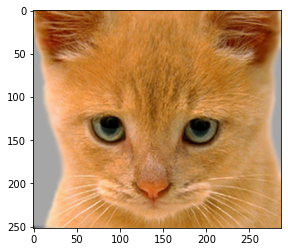

In [7]:
identity_filter = torch.tensor([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
identity_image = my_imfilter(test_image, identity_filter)
plt.imshow(identity_image)
done = save_image('../results/part2/identity_image.jpg', identity_image)

## Small blur with a box filter
This filter should remove some high frequencies.

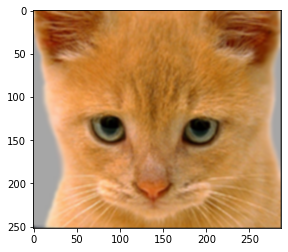

In [8]:
blur_filter = torch.ones((3, 3))
blur_filter /= torch.sum(blur_filter)  # making the filter sum to 1
blur_image = my_imfilter(test_image, blur_filter)
plt.imshow(blur_image)
done = save_image('../results/part2/blur_image.jpg', blur_image)

## Oriented filter (Sobel operator)

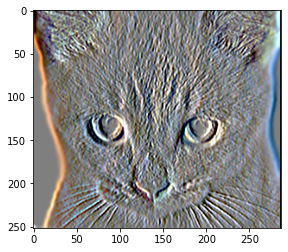

In [9]:
sobel_filter = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # should respond to horizontal gradients
sobel_image = my_imfilter(test_image, sobel_filter)

# 0.5 added because the output image is centered around zero otherwise and mostly black
sobel_image = torch.clamp(sobel_image+0.5, 0.0, 1.0)
plt.imshow(sobel_image)
done = save_image('../results/part2/sobel_image.jpg', sobel_image)

## High pass filter (discrete Laplacian)

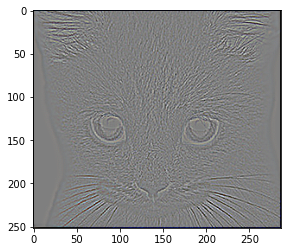

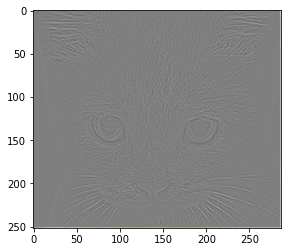

In [10]:
laplacian_filter = torch.tensor([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_image = my_imfilter(test_image, laplacian_filter)

# added because the output image is centered around zero otherwise and mostly black
laplacian_image = torch.clamp(laplacian_image+0.5, 0.0, 1.0)
plt.figure(); plt.imshow(laplacian_image)
done = save_image('../results/part2/laplacian_image.jpg', laplacian_image)

# High pass "filter" alternative
high_pass_image = test_image - blur_image
high_pass_image = torch.clamp(high_pass_image+0.5, 0.0, 1.0)
plt.figure(); plt.imshow(high_pass_image)
done = save_image('../results/part2/high_pass_image.jpg', high_pass_image)